In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [26]:
from llama_index import VectorStoreIndex, SimpleDirectoryReader

documents = SimpleDirectoryReader("../data/raw/").load_data()
index = VectorStoreIndex.from_documents(documents)

In [8]:
query_engine = index.as_query_engine(debug=True)
response = query_engine.query("Ich habe ein Regal, das 100 kg aushält. Reicht das aus, um die CRIMPING MACHINE EPS 2001 dorthin zu bringen?")
print(response)

Es ist nicht möglich, die Frage zu beantworten, ob das Regal ausreicht, um die CRIMPING MACHINE EPS 2001 dorthin zu bringen, da die Gewichtsangabe der Maschine nicht in der gegebenen Kontextinformation enthalten ist.


In [32]:
def display_prompt_dict(prompts_dict):
    for k, p in prompts_dict.items():
        text_md = f"**Prompt Key**: {k}<br>" f"**Text:** <br>"
        display(Markdown(text_md))
        print(p.get_template())
        display(Markdown("<br><br>"))

In [48]:
print(response.__dir__())

['response', 'source_nodes', 'metadata', '__module__', '__annotations__', '__doc__', '__str__', 'get_formatted_sources', '__dict__', '__weakref__', '__dataclass_params__', '__dataclass_fields__', '__init__', '__repr__', '__eq__', '__hash__', '__match_args__', '__new__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__ne__', '__gt__', '__ge__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']


In [58]:
query_engine.get_prompts

{'response_synthesizer:text_qa_template': SelectorPromptTemplate(metadata={'prompt_type': <PromptType.QUESTION_ANSWER: 'text_qa'>}, template_vars=['context_str', 'query_str'], kwargs={}, output_parser=None, template_var_mappings={}, function_mappings={}, default_template=PromptTemplate(metadata={'prompt_type': <PromptType.QUESTION_ANSWER: 'text_qa'>}, template_vars=['context_str', 'query_str'], kwargs={}, output_parser=None, template_var_mappings=None, function_mappings=None, template='Context information is below.\n---------------------\n{context_str}\n---------------------\nGiven the context information and not prior knowledge, answer the query.\nQuery: {query_str}\nAnswer: '), conditionals=[(<function is_chat_model at 0x111937760>, ChatPromptTemplate(metadata={'prompt_type': <PromptType.CUSTOM: 'custom'>}, template_vars=['context_str', 'query_str'], kwargs={}, output_parser=None, template_var_mappings=None, function_mappings=None, message_templates=[ChatMessage(role=<MessageRole.SYS

In [64]:
for context in response.source_nodes:
    print('#'*100)
    print(context.score)
    print(context.text)

####################################################################################################
0.8151083091355623
Hohe Sicherheit für Bediener
Die Sicherheit des Bedieners während des Betriebs  
der Crimpmaschine wird durch eine überwachte Schutz- einrichtung gewährleistet. Das Abnehmen von dieser Einrichtung unterbricht den elektrischen Sicherheitskreis,  wodurch die Maschine angehalten wird.
Für den sicheren Testbetrieb nach dem Umrüsten sowie 
nach Wartungsarbeiten ist der Crimpautomat mit dem bewährten Handrad ausgestattet.
Konform zur Maschinenrichtlinie
Die Crimpmaschine zur Herstellung von hochqualitativen Verbindungen in der Kontakt- und Kabelverarbeitung entspricht vollumfänglich den europäischen Richtlinien, sowohl bezüglich der mechanischen und elektrischen Sicherheit als auch der elektromagnetischen  Verträglichkeit.HOCHQUALITATIVE VERBINDUNGEN
####################################################################################################
0.8080103040386347
© Sch

In [42]:
response.

AttributeError: 'Response' object has no attribute 'context'

In [34]:
from IPython.display import Markdown, display
prompts_dict = query_engine.get_prompts()
display_prompt_dict(prompts_dict)

**Prompt Key**: response_synthesizer:text_qa_template<br>**Text:** <br>

Context information is below.
---------------------
{context_str}
---------------------
Given the context information and not prior knowledge, answer the query.
Query: {query_str}
Answer: 


<br><br>

**Prompt Key**: response_synthesizer:refine_template<br>**Text:** <br>

The original query is as follows: {query_str}
We have provided an existing answer: {existing_answer}
We have the opportunity to refine the existing answer (only if needed) with some more context below.
------------
{context_msg}
------------
Given the new context, refine the original answer to better answer the query. If the context isn't useful, return the original answer.
Refined Answer: 


<br><br>

What is going on under the hood?

In [5]:
# with open(file, "rb") as fp:
#     # Create a PDF object
#     pdf = pypdf.PdfReader(fp)

#     # Get the number of pages in the PDF document
#     num_pages = len(pdf.pages)

#     # Iterate over every page
#     docs = []
#     for page in range(num_pages):
#         # Extract the text from the page
#         page_text = pdf.pages[page].extract_text()
#         page_label = pdf.page_labels[page]

#         metadata = {"page_label": page_label, "file_name": file.name}
#         if extra_info is not None:
#             metadata.update(extra_info)

#         docs.append(Document(text=page_text, metadata=metadata))
#     return docs

In [28]:
import pypdf

In [31]:
reader = pypdf.PdfReader('../data/raw/Schaefer-Crimping-Machine-EPS-2001-STI2015-v5-de-web.pdf')
page = 3
page_text = reader.pages[page].extract_text()
page_label = reader.page_labels[page]
print(page_label)
print(page_text)

2
KONTAKTIEREN SIE UNS WEITERE INFORMATIONEN[1] abhängig von Werkstoff und Kontaktgeometrie
[2] ungefähre Angabe in Basisausstattung, ohne Anbauteile wie z.B. Kontaktstreifenführungsblech und SpulenhalterTECHNISCHE DATEN
Verarbeit bare Materialien
Leitung Einzeladern oder mehradrige MantelleitungenDrahtquerschnitt: < 6 mm² [1]
Kontakte längs- oder quergegurtete Bandware
Leistung und Geometrie Antrieb 0,75 kW Drehstrommotor
Motordrehzahl 440 - 2000 U/min
Presskraft 20 kN
Hub 40 mm
Schließhöhe 135,78 mm
SteuerungBedienoberfläche STI 2015
Display Touchscreen
Anschlüsse und SchnittstellenStromversorgung 230 V, 50/60 Hz
Druckluft 6 bar
Netzwerk RJ-45
Abmessungen und GewichtBreite x Tiefe x Höhe 830 x 600 x 700 mm [2]
Gewicht 112 kg [2]
WWW.SCHAEFER.BIZ Schäfer Werkzeug- und  
Sondermaschinenbau GmbH
Dr.-Alfred-Weckesser-Straße 6 
76669 Bad Schönborn Deutschland Telefon:  +49 7253 9421 0 Fax:         +49 7253 9421 94 E-Mail: 
  
info@schaefer.biz



In [13]:
num_pages = len(reader.pages)

In [160]:
reader = pypdf.PdfReader('../data/raw/Schaefer-Crimping-Machine-EPS-2001-STI2015-v5-de-web.pdf')
page = 3
page_text = reader.pages[page].extract_text()
page_label = reader.page_labels[page]
print(page)
print(page_label)
print(page_text)

3
2
KONTAKTIEREN SIE UNS WEITERE INFORMATIONEN[1] abhängig von Werkstoff und Kontaktgeometrie
[2] ungefähre Angabe in Basisausstattung, ohne Anbauteile wie z.B. Kontaktstreifenführungsblech und SpulenhalterTECHNISCHE DATEN
Verarbeit bare Materialien
Leitung Einzeladern oder mehradrige MantelleitungenDrahtquerschnitt: < 6 mm² [1]
Kontakte längs- oder quergegurtete Bandware
Leistung und Geometrie Antrieb 0,75 kW Drehstrommotor
Motordrehzahl 440 - 2000 U/min
Presskraft 20 kN
Hub 40 mm
Schließhöhe 135,78 mm
SteuerungBedienoberfläche STI 2015
Display Touchscreen
Anschlüsse und SchnittstellenStromversorgung 230 V, 50/60 Hz
Druckluft 6 bar
Netzwerk RJ-45
Abmessungen und GewichtBreite x Tiefe x Höhe 830 x 600 x 700 mm [2]
Gewicht 112 kg [2]
WWW.SCHAEFER.BIZ Schäfer Werkzeug- und  
Sondermaschinenbau GmbH
Dr.-Alfred-Weckesser-Straße 6 
76669 Bad Schönborn Deutschland Telefon:  +49 7253 9421 0 Fax:         +49 7253 9421 94 E-Mail: 
  
info@schaefer.biz



In [161]:
page = 3
page_text = reader.pages[page].extract_text()
page_label = reader.page_labels[page]
print(page)
print(page_label)
print(page_text)

3
2
KONTAKTIEREN SIE UNS WEITERE INFORMATIONEN[1] abhängig von Werkstoff und Kontaktgeometrie
[2] ungefähre Angabe in Basisausstattung, ohne Anbauteile wie z.B. Kontaktstreifenführungsblech und SpulenhalterTECHNISCHE DATEN
Verarbeit bare Materialien
Leitung Einzeladern oder mehradrige MantelleitungenDrahtquerschnitt: < 6 mm² [1]
Kontakte längs- oder quergegurtete Bandware
Leistung und Geometrie Antrieb 0,75 kW Drehstrommotor
Motordrehzahl 440 - 2000 U/min
Presskraft 20 kN
Hub 40 mm
Schließhöhe 135,78 mm
SteuerungBedienoberfläche STI 2015
Display Touchscreen
Anschlüsse und SchnittstellenStromversorgung 230 V, 50/60 Hz
Druckluft 6 bar
Netzwerk RJ-45
Abmessungen und GewichtBreite x Tiefe x Höhe 830 x 600 x 700 mm [2]
Gewicht 112 kg [2]
WWW.SCHAEFER.BIZ Schäfer Werkzeug- und  
Sondermaschinenbau GmbH
Dr.-Alfred-Weckesser-Straße 6 
76669 Bad Schönborn Deutschland Telefon:  +49 7253 9421 0 Fax:         +49 7253 9421 94 E-Mail: 
  
info@schaefer.biz



In [21]:
import fitz

In [162]:
doc = fitz.open('../data/raw/Schaefer-Crimping-Machine-EPS-2001-STI2015-v5-de-web.pdf')

In [163]:
page = 3
text = doc[page].get_text()
images = doc[page].get_images(full=True)
print(text)

KONTAKTIEREN SIE UNS
WEITERE INFORMATIONEN
[1] abhängig von Werkstoff und Kontaktgeometrie
[2] ungefähre Angabe in Basisausstattung, ohne Anbauteile wie z.B. Kontaktstreifenführungsblech und Spulenhalter
TECHNISCHE DATEN
Verarbeit bare Materialien
Leitung
Einzeladern oder mehradrige Mantelleitungen
Drahtquerschnitt: < 6 mm² [1]
Kontakte
längs- oder quergegurtete Bandware
Leistung und Geometrie 
Antrieb 
0,75 kW Drehstrommotor
Motordrehzahl 
440 - 2000 U/min
Presskraft 
20 kN
Hub 
40 mm
Schließhöhe 
135,78 mm
Steuerung
Bedienoberfläche 
STI 2015
Display
Touchscreen
Anschlüsse und Schnittstellen
Stromversorgung 
230 V, 50/60 Hz
Druckluft 
6 bar
Netzwerk 
RJ-45
Abmessungen und Gewicht
Breite x Tiefe x Höhe 
830 x 600 x 700 mm [2]
Gewicht 
112 kg [2]
WWW.SCHAEFER.BIZ
Schäfer Werkzeug- und  
Sondermaschinenbau GmbH
Dr.-Alfred-Weckesser-Straße 6 
76669 Bad Schönborn 
Deutschland 
Telefon:  +49 7253 9421 0 
Fax:         +49 7253 9421 94 
E-Mail:   info@schaefer.biz



In [170]:
len(tables.tables)

1

In [164]:
import matplotlib.pyplot as plt
import io
from PIL import Image

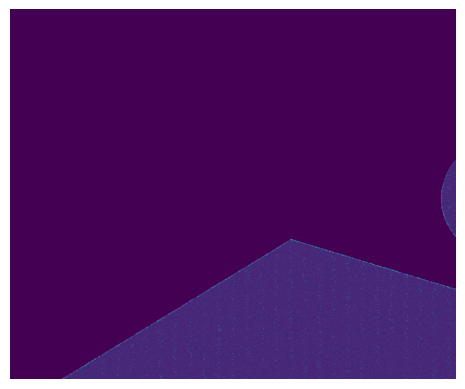

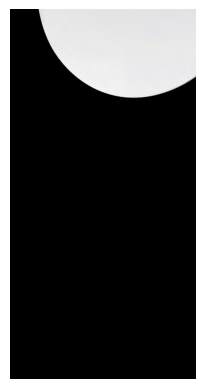

In [165]:
for image_index, img in enumerate(images, start=1):
    xref = img[0]
    base_image = doc.extract_image(xref)
    image_bytes = base_image["image"]
    # Convert bytes to an image and plot it
    image = Image.open(io.BytesIO(image_bytes))
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

In [166]:
page = 3
text = doc[page].get_text()
images = doc[page].get_images(full=True)
res = doc[page].get_text("dict")

In [167]:
tables = doc[page].find_tables()
for i in tables:
    print(i)
    break

In [168]:
tables[0].bbox

(51.02399826049805, 118.7969970703125, 538.58203125, 515.6480102539062)

In [158]:
str(tables[0].extract()[1])

"[None, 'Abbildung PG 0-2 (Quelle: Kostal Kontakt Systeme)']"

'  E 0.2.2                                                                                                                     Durchgangswiderstand im Anschlußbereich\n0    None                                                                                                           Abbildung PG 0-2 (Quelle: Kostal Kontakt Systeme)\n1   E 0.3                                                                                                                       Isolationswiderstand DIN EN 60512-3-1\n2    None  Kontaktteile: beliebig\\nGehäuse: 1 Gehäuse\\nIsolationswiderstand zwischen allen benachbarten Kontakten.\\nAbbildung PG 0-3 (Quelle: Kostal Kontakt Systeme)'

In [144]:
res["blocks"][0]

{'number': 0,
 'type': 0,
 'bbox': (300.09368896484375,
  826.6084594726562,
  312.189697265625,
  838.6084594726562),
 'lines': [{'spans': [{'size': 12.0,
     'flags': 4,
     'font': 'VialogLT-Light',
     'color': 2236191,
     'ascender': 0.8830000162124634,
     'descender': -0.21799999475479126,
     'text': '17',
     'origin': (300.09368896484375, 836.232421875),
     'bbox': (300.09368896484375,
      826.6084594726562,
      312.189697265625,
      838.6084594726562)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (300.09368896484375,
    826.6084594726562,
    312.189697265625,
    838.6084594726562)}]}

####################################################################################################
17 
####################################################################################################
E 0.2.2 Durchgangswiderstand im Anschlußbereich 
####################################################################################################
E 0.3 Isolationswiderstand DIN EN 60512-3-1 
####################################################################################################
Kontaktteile:  beliebig Gehäuse:  1 Gehäuse Isolationswiderstand zwischen allen benachbarten Kontakten. 
####################################################################################################
Abbildung PG 0-3 (Quelle: Kostal Kontakt Systeme) 
####################################################################################################
Anforderung: Durchgangswiderstand: Die Messwerte müssen der Herstellerspezifi kation  entsprechen. 
########################################

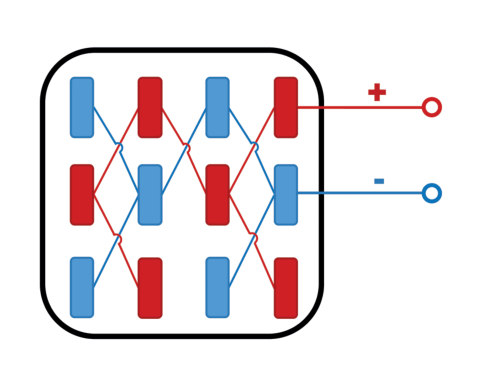


####################################################################################################


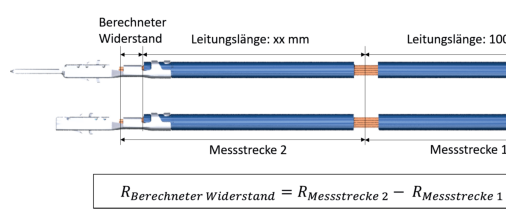


####################################################################################################


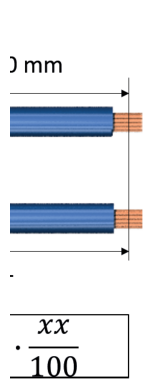

In [141]:
for block in res["blocks"]:
    print('#' * 100)
    all_text = ""
    if block["type"] == 0:  # This block contains text
        for line in block["lines"]:
            for span in line["spans"]:
                all_text += span["text"] + " "
    elif block["type"] == 1:  # Image block
        xref = block["image"]

        # Convert bytes to an image and plot it
        image = Image.open(io.BytesIO(xref))
        plt.imshow(image)
        plt.axis('off')  # Turn off axis numbers
        plt.show()

    print(all_text)

In [104]:
res['blocks'][5]

{'number': 5,
 'type': 0,
 'bbox': (222.33621215820312,
  197.10955810546875,
  249.22630310058594,
  208.90017700195312),
 'lines': [{'spans': [{'size': 8.800000190734863,
     'flags': 0,
     'font': 'ArialUnicodeMS',
     'color': 0,
     'ascender': 1.06884765625,
     'descender': -0.27099609375,
     'text': 'in mm',
     'origin': (222.33621215820312, 206.51541137695312),
     'bbox': (222.33621215820312,
      197.10955810546875,
      246.28988647460938,
      208.90017700195312)},
    {'size': 5.28000020980835,
     'flags': 1,
     'font': 'ArialUnicodeMS',
     'color': 0,
     'ascender': 1.06884765625,
     'descender': -0.27099609375,
     'text': '2',
     'origin': (246.28982543945312, 203.58209228515625),
     'bbox': (246.28982543945312,
      197.93858337402344,
      249.22630310058594,
      205.01295471191406)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (222.33621215820312,
    197.10955810546875,
    249.22630310058594,
    208.90017700195312)}]}